# Introduction to the Demograpic Inference

## Workshop Outline
1. Basics of using Jupyter Notebooks
2. Basics of the SFS
3. Our Dataset
4. Overview of `easySFS`
5. Example Run of `easySFS`
6. Overview of GADMA
7. Example Run of GADMA
8. Evaluate Confidence Intervals (CI) for the Final Model
9. Overview of GONE
10. Example Run of GONE

## Getting Help after Workshop
- Contact: [enoskova.me](http://enoskova.me)
- Feel free to send me email
- [Getting help for GADMA](https://github.com/ctlab/GADMA#getting-help)

----------
## 1. Basics of using Jupyter Notebooks

Jupyter Notebooks have cells where you can write in Markdown and run code.
To execute a cell, click the run button or press shift enter.

In [103]:
print('Try writing some Python here')

Try writing some Python here


In [104]:
%%bash
echo 'We can also use Bash magic. Try writing some Bash here'

We can also use Bash magic. Try writing some Bash here


We want to see pictures in this notebook, for that we need:

In [ ]:
%matplotlib inline

------
## 2. Basics of the SFS

### What is the SFS?

Site frequency spectrum or allele frequency spectrum is a joint distribution of allele frequencies among population.

- One population. SFS is vector $S$ of values, Entry $S[i]$ contains number of positions where derived allele occured in $i$ hyplotype samples.
<div>
<img src="pictures/1d_plot.png" width="300" align="left" />
</div>

- Two populations. SFS is a 2-dimentional matrix where entry $S[i, j]$ corresponds to the number of positions where the derived alleles occured in $i$ haplotype samples in population 1 and in $j$ haplotype samples in population 2.
<div>
<img src="pictures/2d_plot.png" width="250" align="left" />
</div>

- $P$ populations. SFS is a $P$-dimentional tensor. Example for three populations:
<div>
<img src="pictures/3d_plot.png" width="300" align="left" />
</div>

### Ignore monomorphic bins

SFS bin that corresponds to the frequency 0 per population contains number of monomorphic positions with the ancestral allele. Some tools (`dadi`, `moments`, `momi2`) ignore that value as it could be easily evaluated from total sequence length and other values of SFS.

For almost the same reason the bin with maximum frequency per population is excluded from the analisys. The number of sites with fixed derived allele is relatively small and, moreover, could be a consequence of false ancestral allele identification.

On the plots above both monomorphic bins are excluded. The monomorphic bin with 0 frequency is usually very high as most sites are monomorphic, and, thus, including it to the plot will lead to the severe disproportions of other bins.

### What data do we need to build the accurate SFS?

Site frequency spectrum reflects the history of individuals, however, it is important to build it accurately. Some recommendations to keep in mind:

- VCF format file of filtered genotypes
- As many SNP's as possible
- As many individuals as possible (8-10 okay, 100 better)
- No relatives
- Avoid missing data (`easySFS` could help with missing data)
- Coordinates of neutral sites or intergenic regions (similar evolution forces)

### What if we do not know the derived allele? (SFS folding)

Sometimes outgroup information is missed. In that case we can use minor allele frequencies (MAF) to build our SFS. The MAF SFS can be easily built from the usual SFS. This process is called *folding* and MAF SFS is called *folded SFS*.

- Example of the SFS folding in case of one population:

    Unfolded and folded SFS correspondingly:

    <img src="pictures/1d_plot_before_folding.png" width="300" align="left"/>
    <img src="pictures/1d_plot_after_folding.png" width="300" align="left"/>

- Example of the SFS folding in case of two populations:

    Unfolded and folded SFS correspondingly:
    
    <img src="pictures/2d_plot_before_folding.png" width="250" align="left"/>
    <img src="pictures/2d_plot_after_folding.png" width="250" align="left"/>

## 3.  Our Dataset

We have a dataset for clouded leopards (*Neofelis nebulosa*). We have **autosome** data for 5 diploid individuals (10 samples).

All the data is available in the `data` folder:

In [105]:
%%bash
ls data

boots
boots2
chrommap
clouded_leopard_data.vcf
NN_raw.vcf
popmap


- File `data/clouded_leopard_data.vcf` is our VCF file for all 5 individuals (X chromosome is excluded):

In [106]:
%%bash
# First five lines
head -5 data/clouded_leopard_data.vcf

##fileformat=VCFv4.2
##bcftools_viewCommand=view -f PASS -Oz -o /home/anna/Desktop/clouded_leopards/vcf/filt/NN114296_HD_PASS.vcf.gz /home/anna/Desktop/clouded_leopards/vcf/filt/NN114296_HD.vcf.gz; Date=Thu Mar  9 13:25:00 2023
##bcftools_filterCommand=filter --threads 2 -Oz -i FORMAT/DP>=5 -o /home/anna/Desktop/clouded_leopards/vcf/filt/NN114296_HD_PASS_DP5.vcf.gz /home/anna/Desktop/clouded_leopards/vcf/filt/NN114296_HD_PASS.vcf.gz; Date=Thu Mar  9 13:25:27 2023
##bcftools_viewCommand=view -f PASS -Oz -o /home/anna/Desktop/clouded_leopards/vcf/filt/NN114297_HD_PASS.vcf.gz /home/anna/Desktop/clouded_leopards/vcf/filt/NN114297_HD.vcf.gz; Date=Thu Mar  9 13:25:00 2023
##bcftools_filterCommand=filter --threads 2 -Oz -i FORMAT/DP>=5 -o /home/anna/Desktop/clouded_leopards/vcf/filt/NN114297_HD_PASS_DP5.vcf.gz /home/anna/Desktop/clouded_leopards/vcf/filt/NN114297_HD_PASS.vcf.gz; Date=Thu Mar  9 13:25:27 2023


In [107]:
%%bash
# Our schromosomes
head -57 data/clouded_leopard_data.vcf | tail -18

##contig=<ID=CM051599.1,length=243997075>
##contig=<ID=CM051600.1,length=222427791>
##contig=<ID=CM051601.1,length=207471084>
##contig=<ID=CM051602.1,length=170163164>
##contig=<ID=CM051603.1,length=159605645>
##contig=<ID=CM051604.1,length=156028032>
##contig=<ID=CM051605.1,length=150204169>
##contig=<ID=CM051606.1,length=142999991>
##contig=<ID=CM051607.1,length=141813369>
##contig=<ID=CM051608.1,length=115744418>
##contig=<ID=CM051609.1,length=95678116>
##contig=<ID=CM051610.1,length=95590950>
##contig=<ID=CM051611.1,length=92698642>
##contig=<ID=CM051612.1,length=83647936>
##contig=<ID=CM051613.1,length=75977291>
##contig=<ID=CM051614.1,length=66162313>
##contig=<ID=CM051615.1,length=62726519>
##contig=<ID=CM051616.1,length=46369777>


In [108]:
%%bash
# The header line of the VCF file (we take first 84 lines of file and then show the last one)
head -68 data/clouded_leopard_data.vcf | tail -1

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	NN114296	NN114297	NN114393	NN115950	NN190240


- File `data/popmap` provides population assignments per individual (all our individuals are from the same population that is marked as `NN`):

In [109]:
%%bash
cat data/popmap

NN114296	NN
NN114297	NN
NN114393	NN
NN115950	NN
NN190240	NN


- File `data/chrommap` assigns chromosome number for each scaffold name from VCF.

In [110]:
%%bash
cat data/chrommap

CM051599.1 1
CM051600.1 2
CM051601.1 3
CM051602.1 4
CM051603.1 5
CM051604.1 6
CM051605.1 7
CM051606.1 8
CM051607.1 9
CM051608.1 10
CM051609.1 11
CM051610.1 12
CM051611.1 13
CM051612.1 14
CM051613.1 15
CM051614.1 16
CM051615.1 17
CM051616.1 18


- The length of the given sequence is equal to $2{,}329{,}306{,}282$ bp.

We will also use the following values associated with our species of interest [\[Bursell et al. 2022\]](https://doi.org/10.1016/j.isci.2022.105647):
- Generation time 7 years
- Mutation rate of $2.22 \times 10^{-9}$ per base pair per year = $1.554 \times 10^{-8}$ per base pair per **generation**
- Recombination rate of $1$ cM/Mb

-----
## 4. Overview of `easySFS`

### What is [easySFS](https://github.com/isaacovercast/easySFS#install--run)?
- A tool for SFS construction from the VCF file.
- Generates SFS in several formats: `dadi`/`fastsimcoal2`/`momi2` (GADMA accepts all of them)
- Provides means to project SFS down to account for missed data.
- Allows to focus SFS on the independent SNP's (for RADSeq-like data only!)

(Unfortunately, no paper to cite, however, authors ask to credit [\[Gutenkunst et al. 2009\]](https://doi.org/10.1371/journal.pgen.1000695))

### What is the SFS projection?
Assume we have two different datasets with different numbers of samples. We construct two SFS and want to compare them, but they are of different size. SFS is a histogram of allele frequencies and it is possible to downsize or project it. Thus, we could downsize both spectra to some smaller size and compare them.

### Some intuition about SFS projection

Let us get some intuition about how to use information from the bigger SFS for its projection.

Assume we have the following data ($A$ stands for ancestral allele and $T$ for derived allele):

- Sample 1: $A\ A\ A\ T\ A$
- Sample 2: $A\ A\ T\ A\ A$
- Sample 3: $A\ A\ T\ T\ \ .$
- Sample 4: $T\ A\ T\ A\ A$

and we want to build projection of the SFS on three samples.

We can see that the derived allele has frequency of $1/4$ (one out of four) among four samples on the first position.
Let us subsample three individuals from given four samples and compute the frequency of derived allele on the first position. We can choose samples 1, 2, 3 and obtain $0/3$ frequency (with probability $p_1$) or we can obtain frequency of $1/3$ by choosing sample 4 and any other two samples (with probability $p_2$).

Thus, for our SFS projection we can put value equal to $p_1$ in the $0/3$ bin and value of $p_2$ in the $1/3$ bin.

The third position has derived allele frequency of $3/4$. We can obtain frequency of $3/3$ by choosing samples 2, 3, 4 and frequency of $2/3$ by choosing sample 1 and any other two samples.

Having the probabilities of each subsampling frequency (see [hypergeometric distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution)) we can build new SFS with smaller size.

### Accounting for the missed data

SFS projection can easy account for missed information! For the last position in our example data we just add $1$ to the frequency $0/3$ of the projected SFS. That is exactly what `easySFS` does.


--------
## 5. Example Run of `easySFS`

### Installation

Resources: [more information about installation of easySFS](https://github.com/isaacovercast/easySFS#install--run)

Download `easySFS` from GitHub repo:

In [113]:
%%bash
git clone https://github.com/isaacovercast/easySFS.git
ls easySFS

fatal: destination path 'easySFS' already exists and is not an empty directory.


easySFS.py
example_files
jupyter-notebooks
__pycache__
README.md
Spectrum.py


### Run `easySFS` with the `--help` option

In [111]:
%%bash
./easySFS/easySFS.py --help

usage: easySFS.py [-h] -i VCF_NAME -p POPULATIONS [-o OUTDIR]
                  [--proj PROJECTIONS] [--preview] [--ploidy PLOIDY]
                  [--prefix PREFIX] [--unfolded] [--order POP_ORDER]
                  [--dtype DTYPE] [--GQ GQUAL] [--total-length TOTAL_LENGTH]
                  [--window-bp WINDOW_BP] [--window-snp WINDOW_SNP] [-a] [-f]
                  [-v]

optional arguments:
  -h, --help            show this help message and exit
  -i VCF_NAME           name of the VCF input file being converted
  -p POPULATIONS        Input file containing population assignments per
                        individual
  -o OUTDIR             Directory to write output SFS to
  --proj PROJECTIONS    List of values for projecting populations down to
                        different sample sizes
  --preview             Preview the number of segragating sites per population
                        for different projection values.
  --ploidy PLOIDY       Specify ploidy. Default is 2. On

### Run `easySFS` for your VCF file with `--preview` option

In [116]:
%%bash
#./easySFS/easySFS.py -i data/clouded_leopard_data.vcf -p data/popmap -a --preview > outputs/easySFS_preview_output
cat outputs/easySFS_preview_output


  Processing 1 populations - ['NN']

    Running preview mode. We will print out the results for # of segregating sites
    for multiple values of projecting down for each population. The dadi
    manual recommends maximizing the # of seg sites for projections, but also
    a balance must be struck between # of seg sites and sample size.

    For each population you should choose the value of the projection that looks
    best and then rerun easySFS with the `--proj` flag.
    
NN
(2, 2747541)	(3, 2336883)	(4, 2607723)	(5, 1717122)	(6, 1789046)	(7, 1100559)	(8, 1134274)	(9, 513161)	(10, 527501)	



#### Visualize the results of the preview
In this notebook we will use python:

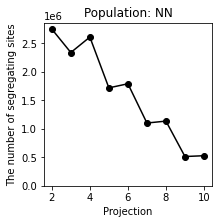

In [117]:
from scripts.draw_easySFS_preview import draw_easySFS_preview
draw_easySFS_preview("outputs/easySFS_preview_output")

Moreover, one can run script from command line the following way (the same picture will appear if you use it from command line interface):

In [115]:
%%bash
python scripts/draw_easySFS_preview.py outputs/easySFS_preview_output

Figure(300x300)


### Run easySFS for your VCF file with `--proj` option

In [119]:
%%bash
#./easySFS/easySFS.py -i data/clouded_leopard_data.vcf -p data/popmap -a --total-length 2329306282 -o outputs/easySFS_output -f --proj 10 

## easySFS output
EasySFS with `--proj` option generates SFS for a given data in several formats:
- `dadi` - input format of dadi, moments,
- `fastsimcoal2` - input format of fastsimcoal2,
- `momi` - input format of momi2 (only if we use full projections, i.e. do not project SFS down).

GADMA can work with any input format mentioned above.

In [118]:
%%bash
ls outputs/easySFS_output

dadi
datadict.txt
fastsimcoal2
momi


In [121]:
%%bash
ls outputs/easySFS_output/dadi

NN-10.sfs
NN-6.sfs
NN-8.sfs
NN.sfs


In [124]:
%%bash
cat outputs/easySFS_output/dadi/NN-10.sfs

11 folded "NN"
7789 143560 127196 111499 95095 52833 0 0 0 0 0
1 0 0 0 0 0 1 1 1 1 1


In [127]:
%%bash
cat outputs/easySFS_output/fastsimcoal2/NN_MAFpop0.obs

clouded_leopard_data_MSFS.obs
NN_DAFpop0.obs
NN_MAFpop0.obs
NN_raw_MSFS.obs


## Picture of our SFS

In this example we will use SFS `output/dadi/NN.sfs` generated for dadi. Let us draw the picture:

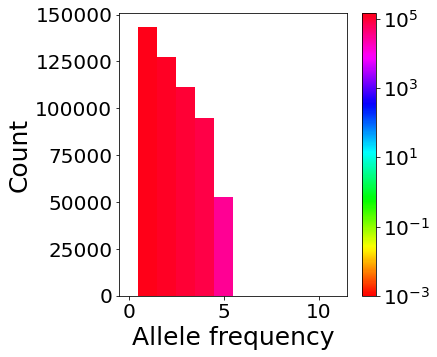

In [129]:
from scripts.draw_sfs import draw_1d_sfs
draw_1d_sfs("outputs/easySFS_output/dadi/NN-10.sfs")

-----
## 6. Overview of GADMA

### What is [GADMA](https://github.com/ctlab/GADMA)?
- Tool for demographic inference from the genetic data.
- Provides demographic history that has highest value of likelihood with the data.
- Includes several likelihood components of existing tools under the common interface (`dadi`, `moments`, `momi2`, `momentsLD`)
- Has effective global optimization for parameter search.
- New model specification using *structure*.
- Repeats demographic inference and provides best result among several repeats (30 repeats is good, 100 is better).

Papers to cite: [\[Noskova et al. 2020\]](https://doi.org/10.1093/gigascience/giaa005), [\[Noskova et al. 2023\]](https://doi.org/10.1101/2022.06.14.496083) and other papers regarding used engines (see more [here](https://gadma.readthedocs.io/en/latest/citations.html)). 

### What is the difference between likelihood engines in GADMA?

GADMA has several engines to evaluate likelihood of the demographic history and data. More information about each engine could be found in the [documentation](https://gadma.readthedocs.io/en/latest/user_manual/set_engine.html).

<img src="pictures/Screenshot_engines.png" width="700" align="left"/>

### What is the model of the demographic history?

Classical tools for demographic inference require parameterized model of the demographic history. It should be specified using interface of the tool and could be error-prone. For example, let us consider the following model for the demographic history of two populations:
- Ancestral population had size equal to $N_{anc}$.
- Ancestral population experienced instanstenious growth up to ($nu_{1F}\cdot N_{anc}$) individuals and it has constant size for ($2\cdot T_p\cdot N_{anc}$) generations.
- Then second population diverged from ancestral population.
- Second population experienced exponential growth from ($nu_{2B}\cdot N_{anc}$) up to ($nu_{2F}\cdot N_{anc}$) individuals during ($2\cdot T\cdot N_{anc}$) generations after split.
- Size of the first population was equal to the size of ancestral population.
- There was migration between populations with rate equal to $m / (2\cdot N_{anc})$ migrants per generation.

This model has one parameter for $N_{anc}$ and additional 6 parameters. Example of the model specification for `dadi` using its Python API:

In [ ]:
def prior_onegrow_mig(params, ns, pts):
    """
    Model with growth, split, bottleneck in pop2, exp recovery, migration

    params list is
    nu1F: The ancestral population size after growth. (Its initial size is
          defined to be 1.)
    nu2B: The bottleneck size for pop2
    nu2F: The final size for pop2
    m: The scaled migration rate
    Tp: The scaled time between ancestral population growth and the split.
    T: The time between the split and present

    ns = (n1,n2): Size of fs to generate.
    pts: Number of points to use in grid for evaluation.
    """
    nu1F, nu2B, nu2F, m, Tp, T = params
    n1,n2 = ns
    # Define the grid we'll use
    xx = yy = dadi.Numerics.default_grid(pts)

    # phi for the equilibrium ancestral population
    phi = dadi.PhiManip.phi_1D(xx)
    # Now do the population growth event.
    phi = dadi.Integration.one_pop(phi, xx, Tp, nu=nu1F)

    # The divergence
    phi = dadi.PhiManip.phi_1D_to_2D(xx, phi)
    # We need to define a function to describe the non-constant population 2
    # size. lambda is a convenient way to do so.
    nu2_func = lambda t: nu2B*(nu2F/nu2B)**(t/T)
    phi = dadi.Integration.two_pops(phi, xx, T, nu1=nu1F, nu2=nu2_func, 
                                    m12=m, m21=m)

    # Finally, calculate the spectrum.
    sfs = dadi.Spectrum.from_phi(phi, (n1,n2), (xx,yy))
    return sfs

### Model specification using structure

GADMA requieres number of epochs in the demographic history. It has several additional handlers for flexibility:
- Enable/disable migrations
- Enable/disable selection
- Enable/disable dynamics of population size

More information [here](https://gadma.readthedocs.io/en/latest/user_manual/set_model/set_model_struct.html).

<img src="pictures/gadma.png" width="700" align="left"/>

### Dynamics of population size change

GADMA has flexible dynamics of population size change for model with structure.

Population dynamic can be:

- Constant (Sudden)
- Linear
- Exponential

<img src="pictures/sudden.png" width="150" align="left"/>
<img src="pictures/linear.png" width="150" align="left"/> 
<img src="pictures/exponential.png" width="150" align="left"/>

### Notes about structure

- Structure model could be used only for data of either 1, 2 or 3 populations. For 4 and 5 populations usual models could be used (custom models).
- Structure should not be very complex: \[3\] for one population, \[2, 1\] for two populations and \[2, 1, 1\] for three populations is enough.
- For three populations the most ancient population should be specified (in order to know the tree topology). It could be just sorted through all options.
- GADMA has a special inference scheme when the structure is increased: it starts from the simple initial structure and then use more complex structures until reachs the final one. Please, use this option as it provides better estimations.


--------
## 7. Example Run of GADMA

### Installation

[Documentation on installation](https://gadma.readthedocs.io/en/latest/user_manual/installation.html#installing-the-latest-release)

GADMA can be easily installed via `pip` or `conda`. Some of its engines should be installed manually (e.g. `moments`).



In [ ]:
%%bash
pip install pandas
pip install demes
pip install demesdraw
pip install gadma
pip install git+https://bitbucket.org/simongravel/moments.git

### Run GADMA with the `--help` option

In [130]:
%%bash
gadma --help

warning in stationary: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy
GADMA version 2.0.0rc24.dev9	by Ekaterina Noskova (ekaterina.e.noskova@gmail.com)
Usage: 
	gadma	-p/--params	<params_file>
		-e/--extra	<extra_params_file>


Instead/With -p/--params and -e/--extra option you can set:
	-o/--output	<output_dir>		output directory.
	-i/--input	<in.fs>/<in.txt>/	input data for demographic inference
			<in.vcf>,<popmap>	(AFS, dadi format or VCF).
	--resume	<resume_dir>		resume another launch from <resume_dir>.
	--only_models		flag to take models only from another
				launch (--resume option).

	-h/--help		show this help message and exit.
	-v/--version		show version and exit.
	--test			run test case.

In case of any questions or problems, please contact: ekaterina.e.noskova@gmail.com


### GADMA output

[More information about GADMA output in the documentation](https://gadma.readthedocs.io/en/latest/user_manual/output.html)

Before we run GADMA let us take a look at its output. GADMA was already run and it created an output directory.
- Our run was saved in `outputs/gadma_outputs/gadma_example_output`:

In [191]:
%%bash
ls outputs/gadma_outputs/gadma_full_example_run/

1
2
3
4
5
6
7
8
best_claic_model_dadi_code.py
best_claic_model_demes_code.py.yml
best_claic_model_moments_code.py
best_claic_model_momi2_code.py
best_claic_model.png
best_logLL_model_dadi_code.py
best_logLL_model_demes_code.py.yml
best_logLL_model_moments_code.py
best_logLL_model_momi2_code.py
best_logLL_model.png
extra_params_file
GADMA.log
params_file


- All command line output is saved in file `GADMA.log`:

In [192]:
%%bash
head -17 outputs/gadma_outputs/gadma_full_example_run/GADMA.log

Data reading
Number of populations: 1
Projections: [10]
Population labels: ['NN']
Outgroup: False
--Successful data reading--

--Successful arguments parsing--

Bootstrap data reading
Number of files found: 20
--Successful bootstrap data reading--

Parameters of launch are saved in output directory: /home/enoskova/Workspace/GADMA_workshop/outputs/gadma_outputs/gadma_full_example_run/params_file
All output is saved in output directory: /home/enoskova/Workspace/GADMA_workshop/outputs/gadma_outputs/gadma_full_example_run/GADMA.log

--Start pipeline--


In [196]:
%%bash
tail -63 outputs/gadma_outputs/gadma_full_example_run/GADMA.log


[000:04:10]
All best by log-likelihood models
Number	log-likelihood	Model
Run 3	-438.95	 [Nanc = 1762] [ [ 28569.437(t1), [1764.727(nu11)], [Sud(dyn11)] ],	[ 13.057(t2), [0.534(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255258.81)
Run 2	-439.07	 [Nanc = 1762] [ [ 12.924(t1), [0.531(nu11)], [Exp(dyn11)] ] ]	(theta =  255155.88)
Run 7	-439.49	 [Nanc = 1764] [ [ 1.994(t1), [1.32(nu11)], [Sud(dyn11)] ],	[ 1.982(t2), [1.32(nu21)], [Sud(dyn21)] ] ]	f	(theta =  255439.98)
Run 1	-439.55	 [Nanc = 1764] [ [ 0.443(t1), [1764.31(nu11)], [Lin(dyn11)] ],	[ 27.982(t2), [1.278(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255453.83)
Run 8	-439.80	 [Nanc = 1765] [ [ 12.796(t1), [215.823(nu11)], [Sud(dyn11)] ],	[ 88.237(t2), [0.136(nu21)], [Lin(dyn21)] ] ]	f	(theta =  255579.40)
Run 5	-439.91	 [Nanc = 1763] [ [ 1.54e-04(t1), [1763.902(nu11)], [Sud(dyn11)] ],	[ 36.103(t2), [1.718(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255394.77)
Run 4	-440.59	 [Nanc = 1765] [ [ 4.84e-08(t1), [23.607(nu11)], [Lin(dyn11)] ],	[ 19.895(t2),

- Picture of the final history is saved in `outputs/gadma_outputs/gadma_example_output/best_logLL_model.png`

<img src="outputs/gadma_outputs/gadma_full_example_run/best_logLL_model.png" width="900" align="left"/>

- GADMA uses parameters file with specified options. Example of parameters file could be found [here](https://gadma.readthedocs.io/en/latest/user_manual/example_params_file.html).

In [134]:
%%bash
cat outputs/gadma_outputs/gadma_example_output/params_file

#    It is a parameters file for GADMA software.

#    Lines started from # are ignored.
#    Also comments at the end of a line are ignored too.
#    Every line contains: Identificator of parameter : value.

#!!!     means pay attention to this parameter, they are primary.

#!!!
#    Output directory to write all GADMA out.
#    One need to set it to a missing or empty directory.
#    If it is resumed from other directory and output directory 
#    isn't set, GADMA will add '_resumed' for previous output 
#    directory.
Output directory: /home/enoskova/Workspace/GADMA_workshop/gadma_output


#!!!
#    Input data can be sfs file (should end with .fs) or 
#    file of SNP's in dadi format (should end with .txt) or
#   VCF file + popmap file (sample population map).
Input data: /home/enoskova/Workspace/GADMA_workshop/easySFS_output/dadi/NN-10.sfs

#    'Population labels' is sequence of population names (the same
#    names as in input file)
#    If .fs file is in old format then it wou

#    (Note: is implemented in moments: one need to have moments 
#    installed.)
#
#    (If optimizations are often hitting the parameter bounds, 
#    try using these methods:)
#    *    optimize_lbfgsb
#    *    optimize_log_lbfgsb 
#    (Note that it is probably best to start with the vanilla BFGS 
#    methods, because the L-BFGS-B methods will always try parameter
#    values at the bounds during the search. 
#    This can dramatically slow model fitting.)
#
#    *    optimize_log_fmin (simplex (a.k.a. amoeba) method)
#    
#    *    hill_climbing
#    
#    Default: optimize_powell
Local optimizer: BFGS_log



#    Parameters of pipeline
#
#    One can automatically generate dadi and moments code for models.
#    If 0 then only current best model will be printed in GA's 
#    working directory.
#    Also the result model will be saved there. 
#    If specified (not 0) then every N iteration model will be saved
#    in python code folder.
#    Default: 0
Print models' code every 

- Each repeat of GADMA run is saved in its own folder:

In [135]:
%%bash
ls outputs/gadma_outputs/gadma_example_output/1

current_best_logLL_model_dadi_code.py
current_best_logLL_model_demes_code.py.yml
current_best_logLL_model_moments_code.py
current_best_logLL_model_momi2_code.py
eval_file
final_best_logLL_model_dadi_code.py
final_best_logLL_model_demes_code.py.yml
final_best_logLL_model_moments_code.py
final_best_logLL_model_momi2_code.py
final_best_logLL_model.png
GADMA_GA.log
save_file_1
save_file_2
save_file_3


### Run GADMA for one-epoch demographic history inference

Let us run GADMA for our data. We need to specify params_file for GADMA with options. We will use moments in our example, but you can choose either `dadi` or `momi2` as well (they are also SFS-based engines).

In [136]:
%%bash
cat gadma_params_files/gadma_params_file_1epoch

Input data: outputs/easySFS_output/dadi/NN-10.sfs
Output directory: outputs/gadma_outputs/gadma_output_1epoch

Mutation rate: 1.554e-8
Sequence length: 2329306282

Engine: moments

# Those are default options:
# Initial structure: 1
# Final structure: 1

Number of repeats: 8
Number of processes: 4


In [138]:
%%bash
rm -rf outputs/gadma_outputs/gadma_output_1epoch
gadma -p gadma_params_files/gadma_params_file_1epoch

warning in stationary: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy
Data reading
Number of populations: 1
Projections: [10]
Population labels: ['NN']
Outgroup: False
--Successful data reading--

--Successful arguments parsing--

Parameters of launch are saved in output directory: /home/enoskova/Workspace/GADMA_workshop/outputs/gadma_outputs/gadma_output_1epoch/params_file
All output is saved in output directory: /home/enoskova/Workspace/GADMA_workshop/outputs/gadma_outputs/gadma_output_1epoch/GADMA.log

--Start pipeline--
Run launch number 2
Run launch number 1
Run launch number 3
Run launch number 4


Finish genetic algorithm number 4
Run launch number 5
Finish genetic algorithm number 2
Run launch number 6


Finish genetic algorithm number 3
Run launch number 7
Finish genetic algorithm number 1
Run launch number 8


Finish genetic algorithm number 5
Finish genetic algorithm number 8
Finish genetic algorithm number 6
Finish genetic algorithm number 7

[000:00:05]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-18821.88	 [Nanc = 1294] [  ]	f	(theta =  187412.14)
Run 4	-18821.88	 [Nanc = 1294] [  ]	f	(theta =  187412.14)
Run 3	-18821.88	 [Nanc = 1294] [  ]	f	(theta =  187412.14)
Run 1	-18821.88	 [Nanc = 1294] [  ]	f	(theta =  187412.14)
Run 5	-18821.88	 [Nanc = 1294] [  ]	f	(theta =  187412.14)
Run 6	-18821.88	 [Nanc = 1294] [  ]	f	(theta =  187412.14)
Run 7	-18821.88	 [Nanc = 1294] [  ]	f	(theta =  187412.14)
Run 8	-18821.88	 [Nanc = 1294] [  ]	f	(theta =  187412.14)


Run 2 warning: failed to generate  some code due to the following exception: momentsLD: 1294.375012853394, 1.0

You can find the picture of the best model in the output directory.


--Finish pipeline--

Thank you for using GADMA!

In case of any questions or problems, please contact: ekaterina.e.noskova@gmail.com



Result demographic history (`outputs/gadma_outputs/gadma_output_1epoch/best_logLL_model.png` file):
<img src="outputs/gadma_outputs/gadma_output_1epoch/best_logLL_model.png" width="900" align="left"/>

### Run GADMA for two-epoch demographic history inference

In [143]:
%%bash
cat gadma_params_files/gadma_params_file_2epochs

Input data: outputs/easySFS_output/dadi/NN-10.sfs
Output directory: outputs/gadma_outputs/gadma_output_2epochs

Mutation rate: 1.554e-8
Sequence length: 2329306282

Engine: moments

Initial structure: 1
Final structure: 2

Number of repeats: 8
Number of processes: 4


In [ ]:
%%bash
rm -rf /home/enoskova/Workspace/GADMA_workshop/outputs/gadma_outputs/gadma_output_2epochs
gadma -p gadma_params_files/gadma_params_file_2epochs

Result demographic history (`outputs/gadma_outputs/gadma_output_2epochs/best_logLL_model.png` file):
<img src="outputs/gadma_outputs/gadma_output_2epochs/best_logLL_model.png" width="900" align="left"/>

Check information that parameters hit their bounds.
The bounds are the following (they are located in the `extra_params_file`, more information is [here](https://gadma.readthedocs.io/en/latest/user_manual/extra_params_file.html)):
- Minimum population size `min_N` = $0.01 (\cdot N_{anc})$
- Maximum population size `max_N` = $100 (\cdot N_{anc})$
- Minimum epoch time `min_T` = ~$0$
- Maximum epoch time `max_T` = $5 (\cdot 2 \cdot N_{anc})$
- Minimum migration rate `min_m` = $0$
- Maximum migration rate `max_m` = $10 (/ (2\cdot N_{anc}))$

All values for `dadi` and `moments` are in genetic units. We should check the parameters in output file with code. We are looking for `p0`:

In [141]:
%%bash
head -20 outputs/gadma_outputs/gadma_output_2epochs/best_logLL_model_moments_code.py

import moments
import numpy as np

def model_func(params, ns):
	t1, nu11 = params
	_Nanc_size = 1.0  # This value can be used in splits with fractions
	sts = moments.LinearSystem_1D.steady_state_1D(np.sum(ns))
	fs = moments.Spectrum(sts)
	nu1_func = lambda t: _Nanc_size * (nu11 / _Nanc_size) ** (t / t1)
	fs.integrate(tf=t1, Npop=lambda t: [nu1_func(t)], dt_fac=0.01)
	return fs

data = moments.Spectrum.from_file('/home/enoskova/Workspace/GADMA_workshop/outputs/easySFS_output/dadi/NN-10.sfs')
ns = data.sample_sizes

p0 = [0.010705518939026418, 0.01]
model = model_func(p0, ns)
ll_model = moments.Inference.ll_multinom(model, data)
print('Model log likelihood (LL(model, data)): {0}'.format(ll_model))



### Run GADMA for two-epoch demographic history inference with wide bounds

In [144]:
%%bash
cat gadma_params_files/gadma_params_file_2epochs_wide_bounds

Input data: easySFS_output/dadi/NN-10.sfs
Output directory: gadma_output_2epochs_wider

Mutation rate: 1.554e-8
Sequence length: 2329306282

Engine: moments

Initial structure: 1
Final structure: 2

# We want wider bounds for population size
# We take lower bound to be 10^(-4)*Nanc
min_N: 1e-4

Number of repeats: 8
Number of processes: 4


In [145]:
%%bash
gadma -p gadma_params_files/gadma_params_file_2epochs_wide_bounds

warning in stationary: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


Traceback (most recent call last):
  File "/home/enoskova/.local/bin/gadma", line 8, in <module>
    sys.exit(main())
  File "/home/enoskova/.local/lib/python3.8/site-packages/gadma/core/core.py", line 51, in main
    settings_storage, args = arg_parser.get_settings()
  File "/home/enoskova/.local/lib/python3.8/site-packages/gadma/cli/arg_parser.py", line 127, in get_settings
    settings_storage = SettingsStorage.from_file(args.params, args.extra)
  File "/home/enoskova/.local/lib/python3.8/site-packages/gadma/cli/settings_storage.py", line 1042, in from_file
    return obj.update_from_file(param_file, extra_param_file)
  File "/home/enoskova/.local/lib/python3.8/site-packages/gadma/cli/settings_storage.py", line 1030, in update_from_file
    self.__setattr__(attr_name, loaded_dict[key])
  File "/home/enoskova/.local/lib/python3.8/site-packages/gadma/cli/settings_storage.py", line 448, in __setattr__
    raise ValueError(f"Setting {name} should be set to existed"
ValueError: Setting i

CalledProcessError: Command 'b'gadma -p gadma_params_files/gadma_params_file_2epochs_wide_bounds\n'' returned non-zero exit status 1.

Result demographic history (file `outputs/gadma_outputs/gadma_output_2epochs_wide_bounds/best_logLL_model.png`):
<img src="outputs/gadma_outputs/gadma_output_2epochs_wide_bounds/best_logLL_model.png" width="900" align="left"/>

### Run GADMA for three-epoch demographic history inference using previous runs

In [146]:
%%bash
cat gadma_params_files/gadma_resume_3epochs

Final structure: 3


In [ ]:
%%bash
gadma --resume gadma_params_files/gadma_output_2epochs_wider -p gadma_resume_3epochs -o gadma_output_3epochs

Result demographic history (`outputs/gadma_outputs/gadma_output_3epochs/best_logLL_model.png` file):
<img src="outputs/gadma_outputs/gadma_output_3epochs/best_logLL_model.png" width="900" align="left"/>

### Final GADMA run with different models comparison

We can compare models with different numbers of paramters (e.g. one-epoch history, two-epoch history and etc.) using AIC or CLAIC. More information is available [here](https://gadma.readthedocs.io/en/latest/user_manual/input_data/input_data.html#unlinked-snps-aic-and-claic).
- AIC could be used if our SNP's are **unlinked**, independent. It is usually a case of RAD-like data, remember easySFS offered us to choose one SNP per RAD locus? That is exactly the way to get set of unlinked SNP's.
- CLAIC [\[Coffman 2016\]](https://doi.org/10.1093/molbev/msv255) is applied when our SNP's are linked (general case). In order to evaluate CLAIC we should provide additional **block-bootstraped** data. Bootstrap should be performed over the regions of linkage (usually genes). A little more about bootstrap will be further. Here we just got some directory with bootstraped data.

In [189]:
%%bash
cat gadma_params_files/gadma_full_example_run

Input data: outputs/easySFS_output/dadi/NN-10.sfs
Output directory: outputs/gadma_outputs/gadma_full_example_run

# We want compare final demographic histories with different
# numbers of epochs using CLAIC
Linked SNP's : True
Directory with bootstrap: data/boots2

Mutation rate: 1.554e-8
Sequence length: 2329306282
Time for generation: 7

Engine: moments

Initial structure: 1
Final structure: 3

# We want wider bounds for population size
# We take lower bound to be 10^(-5)*Nanc
min_N: 1e-5

Number of repeats: 8
Number of processes: 4


In [190]:
%%bash
rm -rf /home/enoskova/Workspace/GADMA_workshop/outputs/gadma_outputs/gadma_full_example_run
gadma -p gadma_params_files/gadma_full_example_run

warning in stationary: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy
Data reading
Number of populations: 1
Projections: [10]
Population labels: ['NN']
Outgroup: False
--Successful data reading--

--Successful arguments parsing--

Bootstrap data reading
Number of files found: 20
--Successful bootstrap data reading--

Parameters of launch are saved in output directory: /home/enoskova/Workspace/GADMA_workshop/outputs/gadma_outputs/gadma_full_example_run/params_file
All output is saved in output directory: /home/enoskova/Workspace/GADMA_workshop/outputs/gadma_outputs/gadma_full_example_run/GADMA.log

--Start pipeline--
Run launch number 2
Run launch number 4
Run launch number 1
Run launch number 3


Run 2: failed to generate code due to the following exception: momentsLD: 1294.375012853394, 1.0


Run 3: failed to generate code due to the following exception: momentsLD: 1294.375012853394, 1.0
Run 1: failed to generate code due to the following exception: momentsLD: 1294.375012853394, 1.0
Run 4: failed to generate code due to the following exception: momentsLD: 1294.375012853394, 1.0


Run 4: failed to generate code due to the following exception: momentsLD: 1765.0525367033642, 1.0


Run 1: failed to generate code due to the following exception: momentsLD: 1763.4659512316525, 1.0


Run 3: failed to generate code due to the following exception: momentsLD: 1764.253974120347, 1.0
N_old,  [0.00028741] N_new [0.00098112]
relative change 2.4136055557060354
N_old,  [0.00098112] N_new [0.00167482]
relative change 0.7070546131703932
N_old,  [0.00167482] N_new [0.00236853]
relative change 0.4141956605929731
N_old,  [0.00236853] N_new [0.00306223]
relative change 0.2928842678100853
N_old,  [0.00028741] N_new [0.00098112]
relative change 2.4136055557060354
N_old,  [0.00098112] N_new [0.00167482]
relative change 0.7070546131703932
N_old,  [0.00167482] N_new [0.00236853]
relative change 0.4141956605929731
N_old,  [0.00236853] N_new [0.00306223]
relative change 0.2928842678100853
N_old,  [0.00028741] N_new [0.00098112]
relative change 2.4136055557060354
N_old,  [0.00098112] N_new [0.00167482]
relative change 0.7070546131703932
N_old,  [0.00167482] N_new [0.00236853]
relative change 0.4141956605929731
N_old,  [0.00236853] N_new [0.00306223]
relative change 0.2928842678100853


Run 4: failed to generate code due to the following exception: momentsLD: 1765.792855380277, 1.0; momi2: Linear size function is  not supported


Run 4: failed to generate code due to the following exception: momentsLD: 1765.792855380277, 1.0; momi2: Linear size function is  not supported


Finish genetic algorithm number 4
Run launch number 5


Run 5: failed to generate code due to the following exception: momentsLD: 1294.375012853394, 1.0


Run 2: failed to generate code due to the following exception: momentsLD: 1762.2518785690447, 1.0
N_old,  [0.00011081] N_new [0.00014984]
relative change 0.3522389841941852
N_old,  [0.00014984] N_new [0.00018887]
relative change 0.2604857486815382

[000:01:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 3	-438.97	 [Nanc = 1764] [ [ 28590.362(t1), [1764.254(nu11)], [Sud(dyn11)] ],	[ 13.066(t2), [0.535(nu21)], [Exp(dyn21)] ] ]	c	(theta =  255445.77)
Run 2	-439.07	 [Nanc = 1762] [ [ 12.924(t1), [0.531(nu11)], [Exp(dyn11)] ] ]	(theta =  255155.88)
Run 1	-439.55	 [Nanc = 1764] [ [ 0.485(t1), [1764.31(nu11)], [Sud(dyn11)] ],	[ 27.982(t2), [1.278(nu21)], [Exp(dyn21)] ] ]	m	(theta =  255453.83)
Run 4	-440.59	 [Nanc = 1765] [ [ 4.84e-08(t1), [23.607(nu11)], [Lin(dyn11)] ],	[ 19.895(t2), [2.67(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255668.58)
Run 5	-1074.14	 [Nanc = 2025] [ [ 10078.645(t1), [351.807(nu11)], [Lin(dyn11)] ] ]	c	(theta =  293224.21)


Run 3 warning: failed to generate  some code due to the following exception: momentsLD: 1764.253974120347, 1.0

You can find the picture of the best model in the output directory.

All best by CLAIC score models
Number	log-likelihood	CLAIC score	Model
Run 3	-438.97	750.50 (eps=1.0e-05)	 [Nanc = 1764] [ [ 13.066(t1), [0.535(nu11)], [Exp(dyn11)] ] ]	(theta =  255445.77)
Run 2	-439.07	750.55 (eps=1.0e-05)	 [Nanc = 1762] [ [ 12.924(t1), [0.531(nu11)], [Exp(dyn11)] ] ]	(theta =  255155.88)
Run 1	-439.59	823.97 (eps=1.0e-05)	 [Nanc = 1763] [ [ 27.918(t1), [1.277(nu11)], [Exp(dyn11)] ] ]	(theta =  255331.67)
Run 4	-440.59	861.17 (eps=1.0e-05)	 [Nanc = 1765] [ [ 4.84e-08(t1), [23.607(nu11)], [Lin(dyn11)] ],	[ 19.895(t2), [2.67(nu21)], [Exp(dyn21)] ] ]	(theta =  255668.58)
Run 4	-440.59	861.17 (eps=1.0e-05)	 [Nanc = 1765] [ [ 4.84e-08(t1), [23.607(nu11)], [Lin(dyn11)] ],	[ 19.895(t2), [2.67(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255668.58)
Run 4	-452.23	875.24 (eps=1.0e-05)	 [Nanc = 1765] [ [ 72.

Run 3 warning: failed to generate  some code due to the following exception: momentsLD: 1764.253974120347, 1.0

You can find the picture of the best model in the output directory.

N_old,  [1.13900121e-05] N_new [5.51038979e-05]
relative change 3.8379138948807103
N_old,  [5.51038979e-05] N_new [9.88177836e-05]
relative change 0.793299338986136
N_old,  [9.88177836e-05] N_new [0.00014253]
relative change 0.4423686117202485
N_old,  [0.00014253] N_new [0.00018625]
relative change 0.30669595006830813


Run 5: failed to generate code due to the following exception: momentsLD: 1763.9017539532197, 1.0


N_old,  [0.00013981] N_new [0.00055123]
relative change 2.942635482442183
N_old,  [0.00055123] N_new [0.00096264]
relative change 0.7463625525480815
N_old,  [0.00096264] N_new [0.00137406]
relative change 0.4273812167233426
N_old,  [0.00137406] N_new [0.00178547]
relative change 0.2994163098940219


Run 1: failed to generate code due to the following exception: momentsLD: 1764.3096851982727, 1.0; momi2: Linear size function is  not supported


Run 1: failed to generate code due to the following exception: momentsLD: 1764.3096851982727, 1.0; momi2: Linear size function is  not supported


Finish genetic algorithm number 1
Run launch number 6


Run 6: failed to generate code due to the following exception: momentsLD: 1294.375012853394, 1.0


Run 2: failed to generate code due to the following exception: momentsLD: 1762.2193787651024, 1.0

[000:02:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 3	-438.95	 [Nanc = 1762] [ [ 28569.437(t1), [1764.727(nu11)], [Sud(dyn11)] ],	[ 13.057(t2), [0.534(nu21)], [Exp(dyn21)] ] ]	(theta =  255258.81)
Run 2	-439.07	 [Nanc = 1762] [ [ 12.924(t1), [0.531(nu11)], [Exp(dyn11)] ] ]	(theta =  255155.88)
Run 1	-439.55	 [Nanc = 1764] [ [ 0.443(t1), [1764.31(nu11)], [Lin(dyn11)] ],	[ 27.982(t2), [1.278(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255453.83)
Run 5	-439.91	 [Nanc = 1763] [ [ 1.54e-04(t1), [1763.902(nu11)], [Sud(dyn11)] ],	[ 36.103(t2), [1.718(nu21)], [Exp(dyn21)] ] ]	m	(theta =  255394.77)
Run 4	-440.59	 [Nanc = 1765] [ [ 4.84e-08(t1), [23.607(nu11)], [Lin(dyn11)] ],	[ 19.895(t2), [2.67(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255668.58)
Run 6	-566.48	 [Nanc = 1873] [ [ 3749.416(t1), [114.29(nu11)], [Lin(dyn11)] ] ]	m	(theta =  271214.06)


Run 2: failed to generate code due to the following exception: momentsLD: 1762.2193787651024, 1.0
Run 3 warning: failed to generate  some code due to the following exception: momentsLD: 1762.9627342670865, 1.0

You can find the picture of the best model in the output directory.



All best by CLAIC score models
Number	log-likelihood	CLAIC score	Model
Run 3	-438.97	750.50 (eps=1.0e-05)	 [Nanc = 1764] [ [ 13.066(t1), [0.535(nu11)], [Exp(dyn11)] ] ]	(theta =  255445.77)
Run 2	-439.07	750.55 (eps=1.0e-05)	 [Nanc = 1762] [ [ 12.924(t1), [0.531(nu11)], [Exp(dyn11)] ] ]	(theta =  255155.88)
Run 1	-439.55	823.56 (eps=1.0e-05)	 [Nanc = 1764] [ [ 0.443(t1), [1764.31(nu11)], [Lin(dyn11)] ],	[ 27.982(t2), [1.278(nu21)], [Exp(dyn21)] ] ]	(theta =  255453.83)
Run 1	-439.55	823.56 (eps=1.0e-05)	 [Nanc = 1764] [ [ 0.443(t1), [1764.31(nu11)], [Lin(dyn11)] ],	[ 27.982(t2), [1.278(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255453.83)
Run 1	-439.59	823.97 (eps=1.0e-05)	 [Nanc = 1763] [ [ 27.918(t1), [1.277(nu11)], [Exp(dyn11)] ] ]	(theta =  255331.67)
Run 5	-439.91	837.75 (eps=1.0e-05)	 [Nanc = 1763] [ [ 36.103(t1), [1.718(nu11)], [Exp(dyn11)] ] ]	(theta =  255394.77)
Run 2	-439.27	851.31 (eps=1.0e-05)	 [Nanc = 1762] [ [ 6.462(t1), [30.578(nu11)], [Exp(dyn11)] ],	[ 6.462(t2), [0.531(nu21

Run 3 warning: failed to generate  some code due to the following exception: momentsLD: 1764.253974120347, 1.0

You can find the picture of the best model in the output directory.



Run 7: failed to generate code due to the following exception: momentsLD: 1294.375012853394, 1.0


Run 3: failed to generate code due to the following exception: momentsLD: 1762.9627342654135, 1.0


Run 3: failed to generate code due to the following exception: momentsLD: 1762.9627342654135, 1.0


Finish genetic algorithm number 3
Run launch number 8


Run 8: failed to generate code due to the following exception: momentsLD: 1294.375012853394, 1.0


Run 5: failed to generate code due to the following exception: momentsLD: 1763.901753953208, 1.0


Run 5: failed to generate code due to the following exception: momentsLD: 1763.901753953208, 1.0


Finish genetic algorithm number 5


Run 8: failed to generate code due to the following exception: momentsLD: 1771.2754870858776, 1.0

[000:03:00]
All best by log-likelihood models
Number	log-likelihood	Model
Run 3	-438.95	 [Nanc = 1762] [ [ 28569.437(t1), [1764.727(nu11)], [Sud(dyn11)] ],	[ 13.057(t2), [0.534(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255258.81)
Run 2	-439.07	 [Nanc = 1762] [ [ 12.924(t1), [0.531(nu11)], [Exp(dyn11)] ] ]	(theta =  255155.88)
Run 1	-439.55	 [Nanc = 1764] [ [ 0.443(t1), [1764.31(nu11)], [Lin(dyn11)] ],	[ 27.982(t2), [1.278(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255453.83)
Run 7	-439.56	 [Nanc = 1762] [ [ 3.961(t1), [1.319(nu11)], [Sud(dyn11)] ] ]	m	(theta =  255231.42)
Run 5	-439.91	 [Nanc = 1763] [ [ 1.54e-04(t1), [1763.902(nu11)], [Sud(dyn11)] ],	[ 36.103(t2), [1.718(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255394.77)
Run 4	-440.59	 [Nanc = 1765] [ [ 4.84e-08(t1), [23.607(nu11)], [Lin(dyn11)] ],	[ 19.895(t2), [2.67(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255668.58)
Run 6	-445.43	 [Nanc = 1769] [ [ 153

Run 3 warning: failed to generate  some code due to the following exception: momentsLD: 1762.9627342654135, 1.0

You can find the picture of the best model in the output directory.

All best by CLAIC score models
Number	log-likelihood	CLAIC score	Model
Run 3	-438.97	750.50 (eps=1.0e-05)	 [Nanc = 1764] [ [ 13.066(t1), [0.535(nu11)], [Exp(dyn11)] ] ]	(theta =  255445.77)
Run 2	-439.07	750.55 (eps=1.0e-05)	 [Nanc = 1762] [ [ 12.924(t1), [0.531(nu11)], [Exp(dyn11)] ] ]	(theta =  255155.88)
Run 3	-438.95	750.74 (eps=1.0e-05)	 [Nanc = 1762] [ [ 28569.437(t1), [1764.727(nu11)], [Sud(dyn11)] ],	[ 13.057(t2), [0.534(nu21)], [Exp(dyn21)] ] ]	(theta =  255258.81)
Run 3	-438.95	750.74 (eps=1.0e-05)	 [Nanc = 1762] [ [ 28569.437(t1), [1764.727(nu11)], [Sud(dyn11)] ],	[ 13.057(t2), [0.534(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255258.81)
Run 1	-439.55	823.56 (eps=1.0e-05)	 [Nanc = 1764] [ [ 0.443(t1), [1764.31(nu11)], [Lin(dyn11)] ],	[ 27.982(t2), [1.278(nu21)], [Exp(dyn21)] ] ]	(theta =  255453.83)
Ru

Run 3 warning: failed to generate  some code due to the following exception: momentsLD: 1764.253974120347, 1.0

You can find the picture of the best model in the output directory.

N_old,  [9.5073746e-05] N_new [0.0001883]
relative change 0.9805188437563185
N_old,  [0.0001883] N_new [0.00028152]
relative change 0.4950818048752483
N_old,  [0.00028152] N_new [0.00037474]
relative change 0.3311402782515694


Run 6: failed to generate code due to the following exception: momentsLD: 1768.306932482266, 1.0


Run 7: failed to generate code due to the following exception: momentsLD: 1762.7735750055033, 1.0
N_old,  [0.00042354] N_new [0.00058455]
relative change 0.38016087871095894
N_old,  [0.00058455] N_new [0.00074557]
relative change 0.2754467863674133

[000:04:00]


Run 6: failed to generate code due to the following exception: momentsLD: 1766.6130318358478, 1.0
All best by log-likelihood models
Number	log-likelihood	Model
Run 3	-438.95	 [Nanc = 1762] [ [ 28569.437(t1), [1764.727(nu11)], [Sud(dyn11)] ],	[ 13.057(t2), [0.534(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255258.81)
Run 2	-439.07	 [Nanc = 1762] [ [ 12.924(t1), [0.531(nu11)], [Exp(dyn11)] ] ]	(theta =  255155.88)
Run 7	-439.49	 [Nanc = 1764] [ [ 1.994(t1), [1.32(nu11)], [Sud(dyn11)] ],	[ 1.982(t2), [1.32(nu21)], [Sud(dyn21)] ] ]	(theta =  255439.98)
Run 1	-439.55	 [Nanc = 1764] [ [ 0.443(t1), [1764.31(nu11)], [Lin(dyn11)] ],	[ 27.982(t2), [1.278(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255453.83)
Run 8	-439.80	 [Nanc = 1765] [ [ 12.796(t1), [215.823(nu11)], [Sud(dyn11)] ],	[ 88.237(t2), [0.136(nu21)], [Lin(dyn21)] ] ]	(theta =  255579.40)
Run 5	-439.91	 [Nanc = 1763] [ [ 1.54e-04(t1), [1763.902(nu11)], [Sud(dyn11)] ],	[ 36.103(t2), [1.718(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255394.77)
Run 4	-440.

Run 3 warning: failed to generate  some code due to the following exception: momentsLD: 1762.9627342654135, 1.0

You can find the picture of the best model in the output directory.

Run 8: failed to generate code due to the following exception: momentsLD: 1765.1769141618236, 1.0; momi2: Linear size function is  not supported
All best by CLAIC score models
Number	log-likelihood	CLAIC score	Model
Run 7	-439.56	659.68 (eps=1.0e-05)	 [Nanc = 1762] [ [ 3.961(t1), [1.319(nu11)], [Sud(dyn11)] ] ]	(theta =  255231.42)
Run 3	-438.97	750.50 (eps=1.0e-05)	 [Nanc = 1764] [ [ 13.066(t1), [0.535(nu11)], [Exp(dyn11)] ] ]	(theta =  255445.77)
Run 2	-439.07	750.55 (eps=1.0e-05)	 [Nanc = 1762] [ [ 12.924(t1), [0.531(nu11)], [Exp(dyn11)] ] ]	(theta =  255155.88)
Run 3	-438.95	750.74 (eps=1.0e-05)	 [Nanc = 1762] [ [ 28569.437(t1), [1764.727(nu11)], [Sud(dyn11)] ],	[ 13.057(t2), [0.534(nu21)], [Exp(dyn21)] ] ]	(theta =  255258.81)
Run 3	-438.95	750.74 (eps=1.0e-05)	 [Nanc = 1762] [ [ 28569.437(t1), [1764.7

Run 7 warning: failed to generate  some code due to the following exception: momentsLD: 1762.7735750055033, 1.0

You can find the picture of the best model in the output directory.

Run 6: failed to generate code due to the following exception: momentsLD: 1766.6130318358478, 1.0


Finish genetic algorithm number 6
Run 8: failed to generate code due to the following exception: momentsLD: 1765.1769141618236, 1.0; momi2: Linear size function is  not supported


Finish genetic algorithm number 8


Run 7: failed to generate code due to the following exception: momentsLD: 1764.214006233267, 1.0


Run 7: failed to generate code due to the following exception: momentsLD: 1764.214006233267, 1.0


Finish genetic algorithm number 7

[000:04:10]
All best by log-likelihood models
Number	log-likelihood	Model
Run 3	-438.95	 [Nanc = 1762] [ [ 28569.437(t1), [1764.727(nu11)], [Sud(dyn11)] ],	[ 13.057(t2), [0.534(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255258.81)
Run 2	-439.07	 [Nanc = 1762] [ [ 12.924(t1), [0.531(nu11)], [Exp(dyn11)] ] ]	(theta =  255155.88)
Run 7	-439.49	 [Nanc = 1764] [ [ 1.994(t1), [1.32(nu11)], [Sud(dyn11)] ],	[ 1.982(t2), [1.32(nu21)], [Sud(dyn21)] ] ]	f	(theta =  255439.98)
Run 1	-439.55	 [Nanc = 1764] [ [ 0.443(t1), [1764.31(nu11)], [Lin(dyn11)] ],	[ 27.982(t2), [1.278(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255453.83)
Run 8	-439.80	 [Nanc = 1765] [ [ 12.796(t1), [215.823(nu11)], [Sud(dyn11)] ],	[ 88.237(t2), [0.136(nu21)], [Lin(dyn21)] ] ]	f	(theta =  255579.40)
Run 5	-439.91	 [Nanc = 1763] [ [ 1.54e-04(t1), [1763.902(nu11)], [Sud(dyn11)] ],	[ 36.103(t2), [1.718(nu21)], [Exp(dyn21)] ] ]	f	(theta =  255394.77)
Run 4	-440.59	 [Nanc = 1765] [ [ 4.84e-08(t1), [23.607(nu1

Run 3 warning: failed to generate  some code due to the following exception: momentsLD: 1762.9627342654135, 1.0

You can find the picture of the best model in the output directory.

All best by CLAIC score models
Number	log-likelihood	CLAIC score	Model
Run 7	-439.56	659.68 (eps=1.0e-05)	 [Nanc = 1762] [ [ 3.961(t1), [1.319(nu11)], [Sud(dyn11)] ] ]	(theta =  255231.42)
Run 7	-439.49	677.08 (eps=1.0e-05)	 [Nanc = 1764] [ [ 1.994(t1), [1.32(nu11)], [Sud(dyn11)] ],	[ 1.982(t2), [1.32(nu21)], [Sud(dyn21)] ] ]	(theta =  255439.98)
Run 7	-439.49	677.08 (eps=1.0e-05)	 [Nanc = 1764] [ [ 1.994(t1), [1.32(nu11)], [Sud(dyn11)] ],	[ 1.982(t2), [1.32(nu21)], [Sud(dyn21)] ] ]	f	(theta =  255439.98)
Run 3	-438.97	750.50 (eps=1.0e-05)	 [Nanc = 1764] [ [ 13.066(t1), [0.535(nu11)], [Exp(dyn11)] ] ]	(theta =  255445.77)
Run 2	-439.07	750.55 (eps=1.0e-05)	 [Nanc = 1762] [ [ 12.924(t1), [0.531(nu11)], [Exp(dyn11)] ] ]	(theta =  255155.88)
Run 3	-438.95	750.74 (eps=1.0e-05)	 [Nanc = 1762] [ [ 28569.437(t1), 

Run 7 warning: failed to generate  some code due to the following exception: momentsLD: 1762.7735750055033, 1.0

You can find the picture of the best model in the output directory.


--Finish pipeline--

Thank you for using GADMA!

In case of any questions or problems, please contact: ekaterina.e.noskova@gmail.com



Final demographic history (`outputs/gadma_outputs/gadma_full_example_run/best_claic_model.png` file):
<img src="outputs/gadma_outputs/gadma_full_example_run/best_claic_model.png" width="900" align="left"/>

-------

## 8. Evaluate Confidence Intervals (CI) for the Final Model

For our final model we want to get confidence intervals for its parameters. In order to do that we need slightly shuffled input data: we will adjust our parameters for each dataset and will get their uncertancy.

The best way to get shuffled data is **bootstrap** - random sampling with replacement.
<img src="pictures/bootstrap_illustration.png" width="900" align="left"/>

Bootstrap should be performed over regions of linkage (e.g. genes). Usually **100** bootstraped data is generated, we will use only 50 for our example.

However, we do not have any annotation, we have only chromosomes. Okay, let us perform bootstrap over chromosomes (it is not the best option but the only we have got). We will use a custom script. BE CAREFULL, THIS PROCESS IS VERY TIME-CONSUMING!

In [89]:
%%bash
python scripts/create_bootstrap_over_chromosomes.py

Usage: scripts/create_bootstrap_over_chromosomes.py <original_VCF> <popmap> <output_dir> <n_boots> <easySFS_location> <easySFS_arguments>


In [147]:
%%bash
#mkdir data/boots
#python scripts/create_bootstrap_over_chromosomes.py data/clouded_leopard_data.vcf data/popmap data/boots 50 ./easySFS/easySFS.py "-a --proj 10"

In [198]:
%%bash
gadma-run_ls_on_boot_data -b data/boots -d outputs/gadma_outputs/gadma_full_example_run/best_claic_model_moments_code.py\
    -o confidence_intervals --opt log -e moments

warning in stationary: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy
Model log likelihood (LL(model, data)): -439.5623354141717
Optimal value of theta: 255231.41917416343
Size of ancestral population: 1762
Model log likelihood (LL(model, data)): -439.5623354141717
Optimal value of theta: 255231.41917416343
Size of ancestral population: 1762
Model log likelihood (LL(model, data)): -439.5623354141717
Optimal value of theta: 255231.41917416343
Size of ancestral population: 1762
50 bootstrapped data found.
Found initial parameters values: [0.00016048889695225048, 0.0007484425138326357]
Parameters labels will be: t1, nu11, Theta
Lower bound will be: [1e-15, 1e-05]
Upper bound will be: [5.0, 100.0]
Optimization to run: optimize_log
Model log likelihood (LL(model, data)): -439.5623354141717
Optimal value of theta: 255231.41917416343
Size of ancestral population: 1762
Model log likelihood (LL(model, data)): -4

01.sfs  0.000160  0.000748  292094.815253
36.sfs  0.000160  0.000748  246538.734316
03.sfs  0.000160  0.000748  269396.206196
28.sfs  0.000145  0.000748  286385.899033
05.sfs  0.000110  0.000748  237420.841853
09.sfs  0.000138  0.000748  261082.026362
10.sfs  0.000148  0.000748  282692.929645
18.sfs  0.000140  0.000748  280210.286276
17.sfs  0.000121  0.000748  217155.800208
22.sfs  0.000157  0.000749  233783.665271
04.sfs  0.000132  0.000748  245719.773002
02.sfs  0.000160  0.000748  215644.247777
08.sfs  0.000135  0.000749  227742.575086
14.sfs  0.000129  0.000749  248307.378809
12.sfs  0.000160  0.000748  196973.533398
26.sfs  0.000160  0.000748  266977.640060
20.sfs  0.000160  0.000748  302356.390843
34.sfs  0.000160  0.000748  192728.044792
45.sfs  0.000157  0.000748  265621.485555
13.sfs  0.000143  0.000748  250499.684090
11.sfs  0.000160  0.000748  241464.270613
44.sfs  0.000160  0.000748  211293.332024
19.sfs  0.000160  0.000748  199508.117536
38.sfs  0.000153  0.000749  245382

In [199]:
%%bash
python scripts/translate_units.py confidence_intervals/result_table.csv 144.78967
cat confidence_intervals/result_table_translated.csv

,t1,nu11
33.sfs,77.04687994868617,202.48353852809572
40.sfs,59.134462312128015,137.88725097973116
42.sfs,93.93231822439388,222.35291568906246
47.sfs,55.73628211822396,180.28940252840079
43.sfs,74.80490399324499,174.42692751627476
50.sfs,32.906416224479194,149.6720438292397
37.sfs,74.80828112403901,175.0397932043893
41.sfs,70.74677112018364,184.50708475376186
35.sfs,84.63801467523663,214.19310970490739
15.sfs,73.80284496488646,172.0903684382427
30.sfs,78.32520410064672,195.1583403677169
49.sfs,68.20800251325338,159.04455022739265
01.sfs,93.75594941084745,218.61617780542727
36.sfs,79.13345905283462,184.5200700687632
03.sfs,86.47019995114444,201.62757378256651
28.sfs,82.97245968350809,214.34338281008164
05.sfs,52.097667472306775,177.69585542402794
09.sfs,72.08421193398632,195.4048892180766
10.sfs,83.71023502643175,211.57940729903098
18.sfs,78.49325959355157,209.72129203162768
17.sfs,52.762721751367565,162.52863508120564
22.sfs,73.35825982730972,175.1486953088448
04.sfs,64.678713225389,183

In [200]:
%%bash
gadma-get_confidence_intervals confidence_intervals/result_table_translated.csv

warning in stationary: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy
t1:	48.16871	97.81839	data does not look normal (reject H0) p-value=1.42e-01
nu11:	141.75821	228.59104	data does not look normal (reject H0) p-value=4.75e-01


### Another way to evaluate CI's

There is a method from [\[Coffman 2016\]](https://doi.org/10.1093/molbev/msv255) that also allows to estimate confidence intervals for the parameters.
- Estimates ancertancy using Godambe Information Matrix.
- Require bootstrap data.
- Does NOT require the whole machinery we just used.
- However, there is no universal script to use it.
- Provides different confidence intervals.

Example script for specific model and data could be found [here](https://github.com/pblischak/inbreeding-sfs/blob/master/data/cabbage/run_cabbage_godambe_3epoch_noF.py). You can use it for your model.

----------
## 9. Overview of GONE

### What is [GONE](https://github.com/esrud/GONE)?

- Estimates effective population size from LD.
- Provides the reliable estimates for a maximum of 100 or 200 generations.
- Can perform poor if there is population structure in the data.

Paper to cite: [\[Santiago et al. 2020\]](https://doi.org/10.1093/molbev/msaa169)

--------
## 10. Example Run of GONE

### Installation

Download repository and find directory with scripts for your system (Linux, MacOS). For Windows you can use [Windows Subsystem for Linux](https://learn.microsoft.com/en-us/windows/wsl/about).

In [33]:
%%bash
git clone https://github.com/esrud/GONE.git

fatal: destination path 'GONE' already exists and is not an empty directory.


CalledProcessError: Command 'b'git clone https://github.com/esrud/GONE.git\n'' returned non-zero exit status 128.

In [148]:
%%bash
ls GONE

CODES_LINUX
CODES_MACOSX
EXAMPLE
GONE TUTORIAL.pdf
Linux
MacOSX
README.md
USER´S GUIDE.pdf


### Copy the corresponding directory for your analysis

In [65]:
%%bash
cp -r GONE/Linux outputs/gone_analysis
ls outputs/gone_analysis

example.map
example.ped
INPUT_PARAMETERS_FILE
PROGRAMMES
script_GONE.sh


### Add rights for execution for all scripts in your new directory

In [66]:
%%bash
chmod +x outputs/gone_analysis/script_GONE.sh
chmod +x outputs/gone_analysis/PROGRAMMES/*

### Input files

All information about GONE's input files is included in [GONE tutorial](https://github.com/esrud/GONE/blob/master/GONE%20TUTORIAL.pdf).

GONE requires:
- .map file describing SNP's.
- .ped file describing individuals and their alleles.
- `INPUT_PARAMETERS_FILE` with options of the run.

In [67]:
%%bash
cat outputs/gone_analysis/INPUT_PARAMETERS_FILE

#INPUT_PARAMETERS_FILE

########################################################

PHASE=2 ### Phase = 0 (pseudohaploids), 1 (known phase), 2 (unknown phase)
cMMb=1  ### CentiMorgans per Megabase (if distance is not available in map file).
DIST=1  ### none (0), Haldane correction (1) or Kosambi correction (2)
NGEN=2000 ### Number of generations for which linkage data is obtained in bins
NBIN=400  ### Number of bins (e.g. if 400, each bin includes NGEN/NBIN = 2000/400 = 5 generations)
MAF=0.0   ### Minor allele frequency (0-1) (recommended 0)
ZERO=1    ### 0: Remove SNPs with zeroes (1: allow for them)
maxNCHROM=-99  ### Maximum number of chromosomes to be analysed (-99 = all chromosomes; maximum number is 200)
maxNSNP=50000 ### Maximum approx number of SNPs per chromosomes to be analysed (maximum number is 50000)
hc=0.05   ### Maximum value of c analysed (recommended 0.05; maximum is 0.5)
REPS=40   ### Number of replicates to run GONE (recommended 40)
threads=-99  ### Number of threads 

### Generate `plink` .map and .ped files from your VCF
We will use `vcftools` to do that.

In [68]:
%%bash
vcftools --vcf data/clouded_leopard_data.vcf --out outputs/gone_analysis/example --plink --chrom-map data/chrommap


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf data/clouded_leopard_data.vcf
	--chrom-map data/chrommap
	--out outputs/gone_analysis/example
	--plink

After filtering, kept 5 out of 5 Individuals
Writing PLINK PED and MAP files ... 
	Read 19 chromosome mapping file entries.
	PLINK: Only outputting biallelic loci.
Done.
After filtering, kept 4323332 out of a possible 4323332 Sites
Run Time = 14.00 seconds


Unfortunately, GONE requeres phenotype information to be set to "-9" in ped file. To set this value use `scripts/fix_ped_file.py` script. It will create new .ped file with suffix `_fixed.ped` at the same directory. We just need to replace our original file with the new one to use GONE.

In [69]:
%%bash
python scripts/fix_ped_file.py outputs/gone_analysis/example.ped
# Replace our original file with outputs/gone_analysis/example_fixed.ped 
mv outputs/gone_analysis/example_fixed.ped outputs/gone_analysis/example.ped

### Run GONE

In [70]:
%%bash
cd outputs/gone_analysis/
./script_GONE.sh example

DIVIDE .ped AND .map FILES IN CHROMOSOMES


./script_GONE.sh: line 99: 580296 Segmentation fault      (core dumped) ./PROGRAMMES/MANAGE_CHROMOSOMES2 >> out <<@
-99
$maxNSNP
@



RUNNING ANALYSIS OF CHROMOSOMES ...
CHROMOSOME ANALYSES took 12 seconds
Running GONE
  Start of processing: outfileLD_TEMP/outfileLD_1
  Start of processing: outfileLD_TEMP/outfileLD_2
  Start of processing: outfileLD_TEMP/outfileLD_3
  Start of processing: outfileLD_TEMP/outfileLD_4
  Start of processing: outfileLD_TEMP/outfileLD_6
  Start of processing: outfileLD_TEMP/outfileLD_7
  Start of processing: outfileLD_TEMP/outfileLD_5
  Start of processing: outfileLD_TEMP/outfileLD_8
  End of processing: outfileLD_TEMP/outfileLD_4
  Start of processing: outfileLD_TEMP/outfileLD_9
  End of processing: outfileLD_TEMP/outfileLD_2
  Start of processing: outfileLD_TEMP/outfileLD_10
  End of processing: outfileLD_TEMP/outfileLD_1
  Start of processing: outfileLD_TEMP/outfileLD_11
  End of processing: outfileLD_TEMP/outfileLD_7
  Start of processing: outfileLD_TEMP/outfileLD_12
  End of processing: outfileLD_TEMP/outfileLD_8
  Start of processing: outfileLD_TEMP/outfileLD_13
  End of processing: 

### Output

We are interested in estimated population sizes. It is located in `Output_Ne_example` file.

In [149]:
%%bash
ls outputs/gone_analysis/

example.map
example.ped
INPUT_PARAMETERS_FILE
outfileHWD
Output_d2_example
OUTPUT_example
Output_Ne_example
PROGRAMMES
script_GONE.sh
seedfile
TEMPORARY_FILES
timefile


In [150]:
%%bash
cat outputs/gone_analysis/Output_Ne_example

Ne averages over 40 independent estimates.
Generation	Geometric_mean
1	2.55419
2	2.55419
3	2.55419
4	2.55419
5	2.55419
6	2.55419
7	383594
8	2.62335e+06
9	2.62335e+06
10	2.62335e+06
11	2.82058e+06
12	2.89063e+06
13	2.90527e+06
14	2.91377e+06
15	2.95388e+06
16	3.07122e+06
17	3.11443e+06
18	3.10283e+06
19	3.13024e+06
20	3.08999e+06
21	3.06231e+06
22	3.03624e+06
23	3.03931e+06
24	3.07323e+06
25	3.11842e+06
26	3.11065e+06
27	3.12265e+06
28	3.15054e+06
29	3.19744e+06
30	3.18926e+06
31	3.1625e+06
32	3.18836e+06
33	3.19908e+06
34	3.17274e+06
35	3.15769e+06
36	3.16226e+06
37	3.17318e+06
38	3.1948e+06
39	3.17738e+06
40	3.18706e+06
41	3.18618e+06
42	3.1991e+06
43	3.21655e+06
44	3.21052e+06
45	3.21207e+06
46	3.18518e+06
47	3.18186e+06
48	3.14724e+06
49	3.1099e+06
50	3.08832e+06
51	3.04744e+06
52	3.05233e+06
53	3.05368e+06
54	3.04757e+06
55	3.10049e+06
56	3.153e+06
57	3.16806e+06
58	3.16814e+06
59	3.18987e+06
60	3.22676e+06
61	3.23529e+06
62	3.23945e+06
63	3.27085e+06
64	3.25299e+06
65	3.22377e+06


### Drawing our history

To draw results from `outputs/gone_analysis/Output_Ne_example` use `scripts/draw_gone_Ne_results.py` script. We will use Python to show result in this notebook:

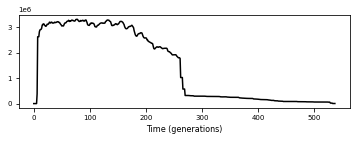

In [160]:
from scripts.draw_gone_Ne_results import draw_Ne_result
draw_Ne_result("outputs/gone_analysis/Output_Ne_example")

However, script could be run from command line:

In [157]:
%%bash
python scripts/draw_gone_Ne_results.py outputs/gone_analysis/Output_Ne_example

Figure(500x200)
